In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def dist(x,a,c):
    a_ = a/(1-a*np.exp(2j*x))
    c_ = c*np.exp(1j*x)/(1-c*np.exp(2j*x))
    f = 1/(2*np.pi) * (1+a_+c_ + np.conj(a_+c_))
    return np.abs(f)

In [114]:
np.angle(0.7*np.exp(1j))

0.9999999999999999

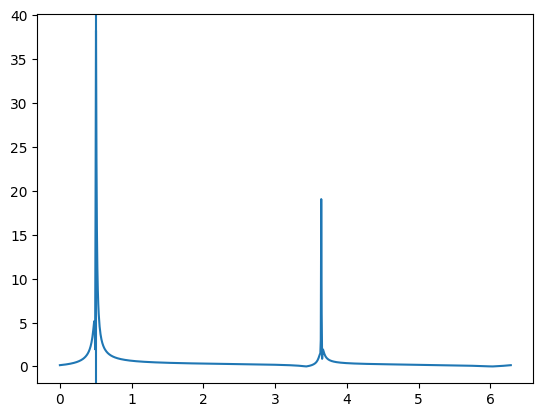

In [115]:
x = np.linspace(0,2*np.pi,1000)
plt.plot(x,dist(x,0.99**2*np.exp(-1j),0.99*np.exp((-1j))))
plt.axvline(np.angle(np.exp((1j)/2))%(np.pi*2))


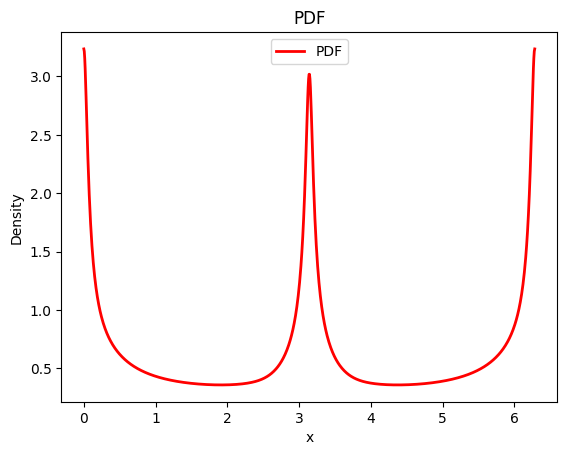

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 수정된 PDF 함수 정의
def pdf(x):
    a = 0.9
    c = 0.4
    a_ = a / (1 - a * np.exp(2j * x))
    c_ = c * np.exp(1j * x) / (1 - c * np.exp(2j * x))
    f = 1 / (2 * np.pi) * (1 + np.abs(a_) + np.abs(c_) + np.abs(np.conj(a_) + np.conj(c_)))
    return np.real(f)  # 복소수 부분을 실수 부분으로 변환

# x 값 범위 설정
x = np.linspace(0, 2 * np.pi, 1000)

# PDF 값 계산
pdf_values = pdf(x)

# PDF 최대값 추정
M = np.max(pdf_values)

# PDF 시각화
plt.plot(x, pdf_values, 'r-', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('PDF')
plt.show()


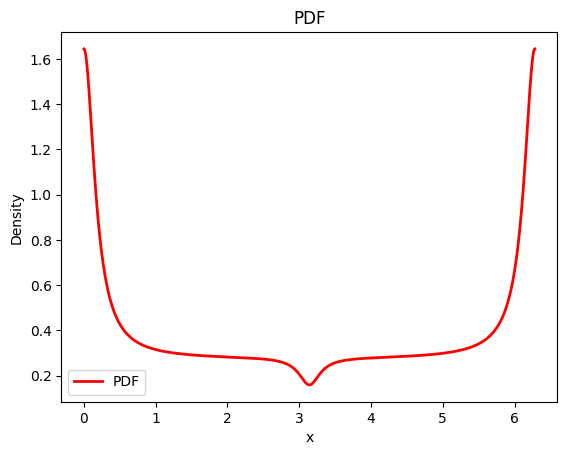

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# PDF 함수 정의
def pdf(x):
    a = 0.7
    c = 0.7
    a_ = a / (1 - a * np.exp(2j * x))
    c_ = c * np.exp(1j * x) / (1 - c * np.exp(2j * x))
    f = 1 / (2 * np.pi) * (1 + a_ + c_ + np.conj(a_ + c_))
    return np.real(f)  # 복소수 부분을 실수 부분으로 변환

# x 값 범위 설정
x = np.linspace(0, 2 * np.pi, 1000)

# PDF 값 계산
pdf_values = pdf(x)

# PDF 최대값 추정
M = np.max(pdf_values)

# PDF 시각화
plt.plot(x, pdf_values, 'r-', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('PDF')
plt.show()


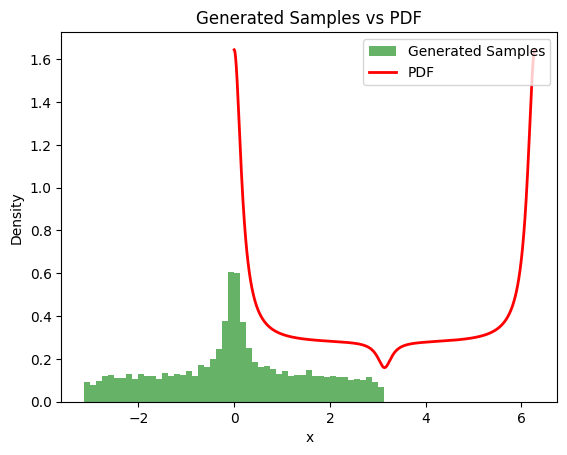

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# PDF 함수 정의
def pdf(x):
    a = 0.7
    c = 0.7
    a_ = a / (1 - a * np.exp(2j * x))
    c_ = c * np.exp(1j * x) / (1 - c * np.exp(2j * x))
    f = 1 / (2 * np.pi) * (1 + a_ + c_ + np.conj(a_ + c_))
    return np.real(f)  # 복소수 부분을 실수 부분으로 변환

# PDF 최대값 추정 (시각화 코드에서 얻은 최대값 사용)
M = np.max(pdf(np.linspace(-np.pi, np.pi, 1000)))

# 난수 생성 (재추출법)
def generate_random_samples(num_samples):
    samples = []
    while len(samples) < num_samples:
        x_candidate = np.random.uniform(-np.pi,np.pi)
        u = np.random.uniform(0, M)
        if u <= pdf(x_candidate):
            samples.append(x_candidate)
    return np.array(samples)

# 샘플 생성
samples = generate_random_samples(10000)

# 결과 시각화
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Generated Samples')
x = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x, pdf(x), 'r-', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Generated Samples vs PDF')
plt.show()


# 새로운 방법으로 만든 확률분포를 가지고 이론 확인

In [13]:
from sympy import *
H,Hs = symbols('H H^*',complex=True)
theta,t,alpha,n,omega = symbols('theta t alpha n omega')
a = Function('a')('t')
a_s = Function('a^*')('t')
b = Function('b')('t')
b_s = Function('b^*')('t')
A = Sum((b*E**(I*2*theta))**n,(n,1,6)).doit()
As = Sum((b_s*E**(-I*2*theta))**n,(n,1,6)).doit()
B = Sum(E**(-I*theta)*(a*E**(I*2*theta))**n,(n,1,6)).doit()
Bs = Sum(E**(I*theta)*(a_s*E**(-I*2*theta))**n,(n,1,6)).doit()
f = 1/(2*pi) * (1+A+As+B+Bs)
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))
f.diff(t)

((6*a(t)**5*exp(12*I*theta)*Derivative(a(t), t) + 5*a(t)**4*exp(10*I*theta)*Derivative(a(t), t) + 4*a(t)**3*exp(8*I*theta)*Derivative(a(t), t) + 3*a(t)**2*exp(6*I*theta)*Derivative(a(t), t) + 2*a(t)*exp(4*I*theta)*Derivative(a(t), t) + exp(2*I*theta)*Derivative(a(t), t))*exp(-I*theta) + (6*a^*(t)**5*exp(-12*I*theta)*Derivative(a^*(t), t) + 5*a^*(t)**4*exp(-10*I*theta)*Derivative(a^*(t), t) + 4*a^*(t)**3*exp(-8*I*theta)*Derivative(a^*(t), t) + 3*a^*(t)**2*exp(-6*I*theta)*Derivative(a^*(t), t) + 2*a^*(t)*exp(-4*I*theta)*Derivative(a^*(t), t) + exp(-2*I*theta)*Derivative(a^*(t), t))*exp(I*theta) + 6*b(t)**5*exp(12*I*theta)*Derivative(b(t), t) + 5*b(t)**4*exp(10*I*theta)*Derivative(b(t), t) + 4*b(t)**3*exp(8*I*theta)*Derivative(b(t), t) + 3*b(t)**2*exp(6*I*theta)*Derivative(b(t), t) + 2*b(t)*exp(4*I*theta)*Derivative(b(t), t) + 6*b^*(t)**5*exp(-12*I*theta)*Derivative(b^*(t), t) + 5*b^*(t)**4*exp(-10*I*theta)*Derivative(b^*(t), t) + 4*b^*(t)**3*exp(-8*I*theta)*Derivative(b^*(t), t) + 3*b^*(

In [14]:
col_ = collect(together(f.diff(t)+(f*v).diff(theta)).expand(),E**(I*theta))


In [15]:
col_

-13*H*a^*(t)**6*exp(-I*alpha)*exp(-13*I*theta)/(4*pi) - 7*H*b^*(t)**6*exp(-I*alpha)*exp(-14*I*theta)/(2*pi) - 13*H^**a(t)**6*exp(I*alpha)*exp(13*I*theta)/(4*pi) - 7*H^**b(t)**6*exp(I*alpha)*exp(14*I*theta)/(2*pi) + (-11*H*a^*(t)**5*exp(-I*alpha)/(4*pi) - 11*I*omega*a^*(t)**6/(2*pi) + 3*a^*(t)**5*Derivative(a^*(t), t)/pi)*exp(-11*I*theta) + (-3*H*b^*(t)**5*exp(-I*alpha)/pi - 6*I*omega*b^*(t)**6/pi + 3*b^*(t)**5*Derivative(b^*(t), t)/pi)*exp(-12*I*theta) + (-11*H^**a(t)**5*exp(I*alpha)/(4*pi) + 11*I*omega*a(t)**6/(2*pi) + 3*a(t)**5*Derivative(a(t), t)/pi)*exp(11*I*theta) + (-3*H^**b(t)**5*exp(I*alpha)/pi + 6*I*omega*b(t)**6/pi + 3*b(t)**5*Derivative(b(t), t)/pi)*exp(12*I*theta) + (-H*exp(-I*alpha)/(2*pi) + H^**b^*(t)**2*exp(I*alpha)/(2*pi) - I*omega*b^*(t)/pi + Derivative(b^*(t), t)/(2*pi))*exp(-2*I*theta) + (-H*a(t)*exp(-I*alpha)/(4*pi) + H^**a^*(t)**2*exp(I*alpha)/(4*pi) - I*omega*a^*(t)/(2*pi) + Derivative(a^*(t), t)/(2*pi))*exp(-I*theta) + (H*a(t)**2*exp(-I*alpha)/(4*pi) - H^**a^*(t)

In [64]:
terms_with_exp = [term for term in col_.args if term.has(exp(12*I*theta))]

In [91]:
print_latex((col_.args[9].args[0].simplify().args[2]/4*E**(-I*alpha)).expand())

- \frac{3 H e^{- i \alpha}}{4} + \frac{3 H^{*} \left(a^{*}\right)^{2}{\left(t \right)} e^{- i \alpha} e^{2 i \alpha}}{4} - \frac{3 i \omega a^{*}{\left(t \right)} e^{- i \alpha} e^{i \alpha}}{2} + e^{- i \alpha} e^{i \alpha} \frac{d}{d t} a^{*}{\left(t \right)}


In [65]:
col_.args

((-11*H^**a(t)**5*exp(I*alpha)/(4*pi) + 11*I*omega*a(t)**6/(2*pi) + 3*a(t)**5*Derivative(a(t), t)/pi)*exp(11*I*theta),
 (-11*H*a^*(t)**5*exp(-I*alpha)/(4*pi) - 11*I*omega*a^*(t)**6/(2*pi) + 3*a^*(t)**5*Derivative(a^*(t), t)/pi)*exp(-11*I*theta),
 (-3*H^**b(t)**5*exp(I*alpha)/pi + 6*I*omega*b(t)**6/pi + 3*b(t)**5*Derivative(b(t), t)/pi)*exp(12*I*theta),
 (-3*H*b^*(t)**5*exp(-I*alpha)/pi - 6*I*omega*b^*(t)**6/pi + 3*b^*(t)**5*Derivative(b^*(t), t)/pi)*exp(-12*I*theta),
 (H*a(t)**2*exp(-I*alpha)/(4*pi) - H^**a^*(t)*exp(I*alpha)/(4*pi) + I*omega*a(t)/(2*pi) + Derivative(a(t), t)/(2*pi))*exp(I*theta),
 (-H*a(t)*exp(-I*alpha)/(4*pi) + H^**a^*(t)**2*exp(I*alpha)/(4*pi) - I*omega*a^*(t)/(2*pi) + Derivative(a^*(t), t)/(2*pi))*exp(-I*theta),
 (H*b(t)**2*exp(-I*alpha)/(2*pi) - H^**exp(I*alpha)/(2*pi) + I*omega*b(t)/pi + Derivative(b(t), t)/(2*pi))*exp(2*I*theta),
 (-H*exp(-I*alpha)/(2*pi) + H^**b^*(t)**2*exp(I*alpha)/(2*pi) - I*omega*b^*(t)/pi + Derivative(b^*(t), t)/(2*pi))*exp(-2*I*theta),
 (3*

In [98]:
# H에 대한 부분 적기
theta,t,alpha,n,omega = symbols('theta t alpha n omega',real=True)

K,beta = symbols('K beta',real=True)
sigma1,sigma2 = symbols('sigma1,sigma2')
Z = IndexedBase('Z')
Zs = IndexedBase('Z^*')
R = IndexedBase('R', real = True)
dotR = IndexedBase(r'\dot{R}', real = True)
dotpsi = IndexedBase(r'\dot{psi}', real = True)
psi = IndexedBase('psi', real = True)
phi = symbols('phi',real=True)
Z1A = R['A']*E**(psi['A']*I)
Z1B = R['B']*E**(psi['B']*I)
Z1As = R['A']*E**(-psi['A']*I)
Z1Bs = R['B']*E**(-psi['B']*I)
H1 = K*Z1A*Z1A+ 2*K*beta*Z1A*Z1B + K*beta**2*Z1B*Z1B
H1s = K*Z1As*Z1As + 2*K*beta*Z1As*Z1Bs + K*beta**2*Z1Bs*Z1Bs
dZ1dt =  3/2 * I*omega*Z1A + 3/4 *(H1*E**(-I*alpha) - H1s*Z1A**2*E**(I*alpha))
# dR1dt = I*omega*R['A'] + 1/2 *(H1*R['A']*E**(-2j*psi['A'])*E**(-I*alpha) - H1s*R['A']**2*E**(1j*psi['A'])*E**(I*alpha))
dpsi1dt = dZ1dt/Z1A

In [99]:
dR_dt = re(dZ1dt/(E**(I*psi['A']))).simplify()

In [101]:
dpsi1_dt = im(dpsi1dt).simplify()

In [105]:
dpsi1_dt.collect(R['A'])

-1.5*K*beta*sin(alpha - psi[B])*R[A]**2*R[B] - 1.5*K*beta*sin(alpha - psi[B])*R[B] - 0.75*K*sin(alpha - psi[A])*R[A]**3 + 1.5*omega + (-0.75*K*beta**2*sin(alpha + psi[A])*R[B]**2 + 1.5*K*beta**2*sin(psi[B])*cos(alpha + psi[A] - psi[B])*R[B]**2)/R[A] + (-0.75*K*beta**2*sin(alpha + psi[A])*R[B]**2 + 1.5*K*beta**2*sin(psi[B])*cos(alpha + psi[A] - psi[B])*R[B]**2 - 0.75*K*sin(alpha - psi[A]))*R[A]

In [106]:
solve(dR_dt,R['A'])

KeyboardInterrupt: 

In [94]:
dR_expand = dR_dt.expand()

In [95]:
dR_sim = dR_expand.simplify()

In [97]:
dR_sim

K*(-1.5*beta**2*sin(alpha + psi[A] - psi[B])*sin(psi[B])*R[A]**2*R[B]**2 + 1.5*beta**2*sin(alpha + psi[A] - psi[B])*sin(psi[B])*R[B]**2 - 0.75*beta**2*cos(alpha + psi[A])*R[A]**2*R[B]**2 + 0.75*beta**2*cos(alpha + psi[A])*R[B]**2 - 1.5*beta*cos(alpha - psi[B])*R[A]**3*R[B] + 1.5*beta*cos(alpha - psi[B])*R[A]*R[B] - 0.75*cos(alpha - psi[A])*R[A]**4 + 0.75*cos(alpha - psi[A])*R[A]**2)

In [96]:
dR_sim.subs(psi['A']-psi['B'],phi).collect(R['A']).collect(beta).collect(R['B'])

K*(beta**2*(1.5*sin(alpha + phi)*sin(psi[B]) + 0.75*cos(alpha + psi[A]))*R[B]**2 + beta*(-1.5*cos(alpha - psi[B])*R[A]**3 + 1.5*cos(alpha - psi[B])*R[A])*R[B] + (beta**2*(-1.5*sin(alpha + phi)*sin(psi[B]) - 0.75*cos(alpha + psi[A]))*R[B]**2 + 0.75*cos(alpha - psi[A]))*R[A]**2 - 0.75*cos(alpha - psi[A])*R[A]**4)

In [58]:
solve(dR_sim,R['A'])

[0.0,
 -0.139991227766097*(4.0*(beta*cos(alpha - psi[B])*R[B] - 0.5*cos(alpha))**2/cos(alpha - psi[A])**2 - 3.0*(2.0*beta**2*sin(alpha + psi[A] - psi[B])*sin(psi[B])*R[B]**2 + beta**2*cos(alpha + psi[A])*R[B]**2 + 2.0*beta*sin(alpha - psi[B])*sin(psi[A])*R[B] - 2.0*beta*cos(alpha - psi[B])*cos(psi[A])*R[B])/cos(alpha - psi[A]))/(0.592592592592593*(beta*cos(alpha - psi[B])*R[B] - 0.5*cos(alpha))**3/cos(alpha - psi[A])**3 - 0.333333333333333*(2.0*beta*cos(alpha - psi[B])*R[B] - cos(alpha))*(2.0*beta**2*sin(alpha + psi[A] - psi[B])*sin(psi[B])*R[B]**2 + beta**2*cos(alpha + psi[A])*R[B]**2 + 2.0*beta*sin(alpha - psi[B])*sin(psi[A])*R[B] - 2.0*beta*cos(alpha - psi[B])*cos(psi[A])*R[B])/cos(alpha - psi[A])**2 + (-0.35116598079561*((beta*cos(alpha - psi[B])*R[B] - 0.5*cos(alpha))**2/cos(alpha - psi[A])**2 - 0.75*(2.0*beta**2*sin(alpha + psi[A] - psi[B])*sin(psi[B])*R[B]**2 + beta**2*cos(alpha + psi[A])*R[B]**2 + 2.0*beta*sin(alpha - psi[B])*sin(psi[A])*R[B] - 2.0*beta*cos(alpha - psi[B])*cos(